# **PROYECTO BASES DE PROGRAMACIÓN**
## Maestría en Ciencias de la Tierra
### **Integrantes**: Janner Galarza, Diana Mejía, Jenifer Malave

## **Introducción**
#### Texto
## **Objetivos**
#### Texto

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga y Preparación de Datos

### Lo primero que se realizó fue cargar la base de datos metereológicos

In [2]:
data = pd.read_csv('Weather_Data-1.csv')
print (data.head())

       Location        Date_Time  Temperature_C  Humidity_pct  \
0     San Diego  1/14/2024 21:12      10.683001     41.195754   
1     San Diego  5/17/2024 15:22       8.734140     58.319107   
2     San Diego   5/11/2024 9:30      11.632436     38.820175   
3  Philadelphia  2/26/2024 17:32      -8.628976     54.074474   
4   San Antonio  4/29/2024 13:23      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh  
0          4.020119        8.233540  
1          9.111623       27.715161  
2          4.607511       28.732951  
3          3.183720       26.367303  
4          9.598282       29.898622  


### Para la limpieza de datos se eliminó los duplicados y modificó los tipos de datos en caso de ser necesario

In [3]:
#Para eliminar los duplicados se realizó una función 
def eliminar_duplicados(df):
    return df.drop_duplicates()
    
data = eliminar_duplicados(data)

In [4]:
# Para conocer si dedemos modificar o no los tipos de datos primero deberiamos conocer que tipo de datos tenemos
#Para eso se uso el metodo .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [5]:
# Ahora generaremos una función para cambiar el tipo de dato, la función aplica para cualquier
#cambio, pero en este caso particular para nuestro proyecto cambiaremos el formato de la fecha
def cambiar_tipodatos(df, columna, tipo):
    df[columna] = df[columna].astype(tipo)
    return df

data = cambiar_tipodatos(data, 'Date_Time', 'datetime64[ns]') 
print (data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Location          1000000 non-null  object        
 1   Date_Time         1000000 non-null  datetime64[ns]
 2   Temperature_C     1000000 non-null  float64       
 3   Humidity_pct      1000000 non-null  float64       
 4   Precipitation_mm  1000000 non-null  float64       
 5   Wind_Speed_kmh    1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 45.8+ MB
None


,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622


In [6]:
# Para que la data presentada se vea de una manera mas amigable, cambiaremos el nombre de las columnas
def cambiar_nombre_columnas(df, nuevos_nombres):
    df.rename(columns=nuevos_nombres, inplace = True)
    return df
nuevos_nombres = {"Date_Time":"Date Time", "Temperature_C":"Temperature (C)", "Humidity_pct":"Humidity (pct)", "Precipitation_mm":"Precipitation (mm)", "Wind_Speed_kmh":"Wind Speed (Km/h)"}
data = cambiar_nombre_columnas(data, nuevos_nombres)
data.head()

,Location,Date Time,Temperature (C),Humidity (pct),Precipitation (mm),Wind Speed (Km/h)
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622


### Ahora para realizar un resumen estadístico de los datos utilizaremos el metodo .describe()

In [7]:
data.describe()

,Date Time,Temperature (C),Humidity (pct),Precipitation (mm),Wind Speed (Km/h)
count,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2024-03-10 10:40:29.383980544,14.779705,60.021830,5.109639,14.997598
min,2024-01-01 00:00:00,-19.969311,30.000009,0.000009,0.000051
25%,2024-02-04 16:28:00,2.269631,45.008500,2.580694,7.490101
50%,2024-03-10 11:43:00,14.778002,60.018708,5.109917,14.993777
75%,2024-04-14 03:51:00,27.270489,75.043818,7.613750,22.514110
max,2024-05-18 19:44:00,39.999801,89.999977,14.971583,29.999973
std,NaN,14.482558,17.324022,2.947997,8.663556


# 2. Automatización del Análisis Exploratorio de Datos (EDA)

### Almacenar y manipular información relevante

In [8]:
# Para este paso utilizaremos tuplas y como información relevante tomaremos a las columnas de Fecha, temperatura, velocidad del viento, ubicacion y precipitacion
data_relevante = data [["Temperature (C)", "Precipitation (mm)","Date Time","Location","Wind Speed (Km/h)"]]

# Y a continuacion elaboraremos una funcion que sea capaz de calcular las estadisticas de nuestra tupla
def calcular_estadisticas(df, columna):
    media = df[columna].mean()
    mediana = df[columna].median()
    desviacion = df[columna].std()
    return media, mediana, desviacion

media_temp, mediana_temp, desviacion_temp = calcular_estadisticas(data_relevante, "Temperature (C)")
media_preci, mediana_preci, desviacion_preci = calcular_estadisticas(data_relevante, "Precipitation (mm)")
print(f"Media de Temperatura: {media_temp}, Mediana de Temperatura: {mediana_temp}, Desviacion de Temperatura: {desviacion_temp}")
print(f"Media de Precipitacion: {media_preci}, Mediana de Precipitacion: {mediana_preci}, Desviacion de Precipitacion: {desviacion_preci}")

Media de Temperatura: 14.779704927041585, Mediana de Temperatura: 14.778002115, Desviacion de Temperatura: 14.482558096887805
Media de Precipitacion: 5.109639125976419, Mediana de Precipitacion: 5.109917161, Desviacion de Precipitacion: 2.9479970526541917


### Análisis especificos al conjunto de datos

In [9]:
# A continuación encontraremos la fecha con la temperatura promedio más alta
FechaCalor = data_relevante.groupby("Date Time")["Temperature (C)"].mean().idxmax()
print(f"La fecha con la temperatura promedio más alta es: {FechaCalor}")

La fecha con la temperatura promedio más alta es: 2024-03-06 21:25:00


In [10]:
AñoLluvioso = data_relevante.groupby("Date Time")["Precipitation (mm)"].sum().idxmax()
print(f"El año con más lluvias es: {AñoLluvioso}")

El año con más lluvias es: 2024-01-10 02:12:00


In [11]:
CiudadViento = data_relevante.groupby("Location")["Wind Speed (Km/h)"].mean().idxmax()
print(f"La ciudad con más viento es: {CiudadViento}")

La ciudad con más viento es: San Diego


# 3. Manipulación de Datos con Pandas

### Funciones de agrupamiento y agregación. 

In [25]:
# Crear una función para agrupar y agregar
def agrupar_y_agregar (df, grupo, columna, funcion):
    return df.groupby(grupo)[columna].agg(funcion).reset_index()

mediaWind_porCiudad = agrupar_y_agregar(data, "Location", "Wind Speed (Km/h)", 'mean')
mediaWind_porCiudad
#print(data)

,Location,Wind Speed (Km/h)
0,Chicago,14.999501
1,Dallas,15.022001
2,Houston,14.989935
3,Los Angeles,15.035120
4,New York,14.989398
5,Philadelphia,14.990663
6,Phoenix,14.983904
7,San Antonio,14.956579
8,San Diego,15.037633
9,San Jose,14.971369


In [23]:
maxTemp_porCiudad = agrupar_y_agregar(data, "Location", "Temperature (C)", 'max')
maxTemp_porCiudad

,Location,Temperature (C)
0,Chicago,39.998561
1,Dallas,39.998804
2,Houston,39.998913
3,Los Angeles,39.999592
4,New York,39.999801
5,Philadelphia,39.999642
6,Phoenix,39.998889
7,San Antonio,39.998343
8,San Diego,39.999692
9,San Jose,39.999015


### Filtrar datos

In [13]:
### Filtrar y seleccionar datos utilizando métodos avanzandos de Pandas
def filtrar_datos(df, columna, condicion):
    return df[df[columna] == condicion]

datos_por_ciudad = filtrar_datos(data, "Location", "San Jose")
datos_por_ciudad

,Location,Date Time,Temperature (C),Humidity (pct),Precipitation (mm),Wind Speed (Km/h)
6,San Jose,2024-01-13 02:10:00,1.881883,65.742325,0.221709,1.073112
9,San Jose,2024-05-18 09:14:00,-1.607088,82.198701,4.101493,25.647282
23,San Jose,2024-04-22 03:13:00,34.539654,57.793010,3.583560,13.044745
25,San Jose,2024-03-05 21:38:00,-1.733200,47.973206,7.066382,3.430741
49,San Jose,2024-05-08 20:16:00,35.097440,40.225820,6.088406,20.013380
...,...,...,...,...,...,...
999932,San Jose,2024-05-07 03:10:00,36.462987,54.691087,9.135078,17.524197
999962,San Jose,2024-05-16 22:35:00,24.326973,58.667543,2.238676,26.798245
999969,San Jose,2024-01-07 06:52:00,19.964541,86.875155,5.353166,19.146324
999971,San Jose,2024-02-07 18:39:00,38.428298,42.200630,2.999543,10.208343


### Crear nuevas columnas derivadas

In [14]:
# Para esto vamos a crear la columna correspondiente al valor de sensacion termica a partir de la humedad y la temperatura
def calcularSensacionTermica(df):
    df["sensacion_termica"] = df["Temperature (C)"] - ((100 - df["Humidity (pct)"])/5)
    return df

sensTermica = calcularSensacionTermica(data)
data.head()
## Ahora guardaremos el DataFrame modificado como archivo de Excel con el siguiente codigo.
#data.to_excel("Datos_modificados.xlsx", index=False)

,Location,Date Time,Temperature (C),Humidity (pct),Precipitation (mm),Wind Speed (Km/h),sensacion_termica
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540,-1.077848
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161,0.397961
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951,-0.603529
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303,-17.814081
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622,34.388195


# 4. Visualización de Datos Automatizada

### Ahora para visualizar los datos se generó la función para generar gráficos de línea

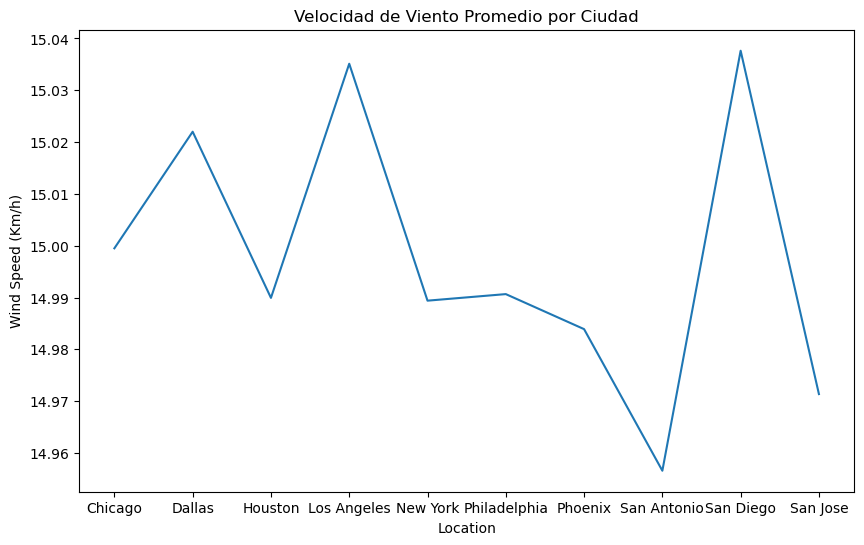

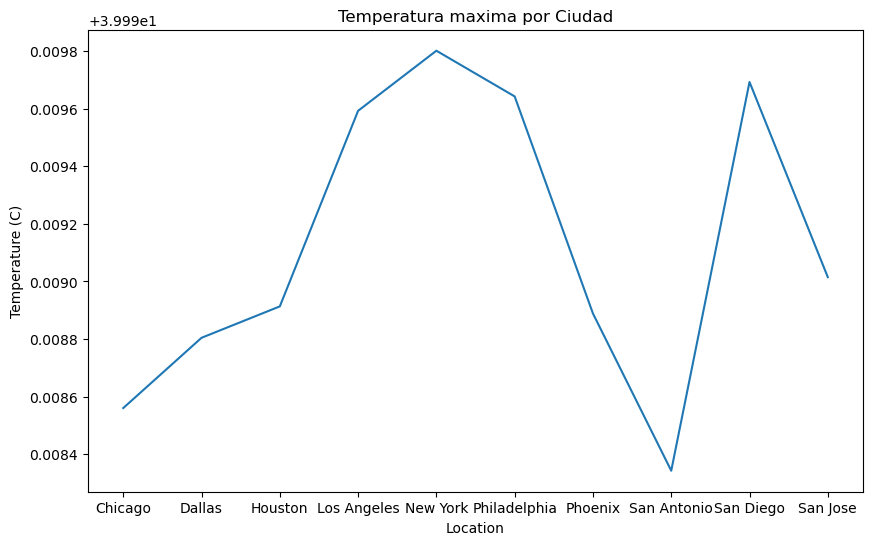

In [55]:
#plt.rcParams["agg.path.chunksize"] = 
def graficolinea(df, x, y, titulo):
    plt.figure(figsize=(10,6))
    plt.plot(df[x], df[y])
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

grafico = graficolinea(mediaWind_porCiudad, "Location", "Wind Speed (Km/h)", "Velocidad de Viento Promedio por Ciudad")
grafico2 = graficolinea(maxTemp_porCiudad, "Location", "Temperature (C)", "Temperatura maxima por Ciudad")

### Utilizando la libreria Seaborn tambien se pueden hacer funciones que realicen graficos tal como el siguiente histograma

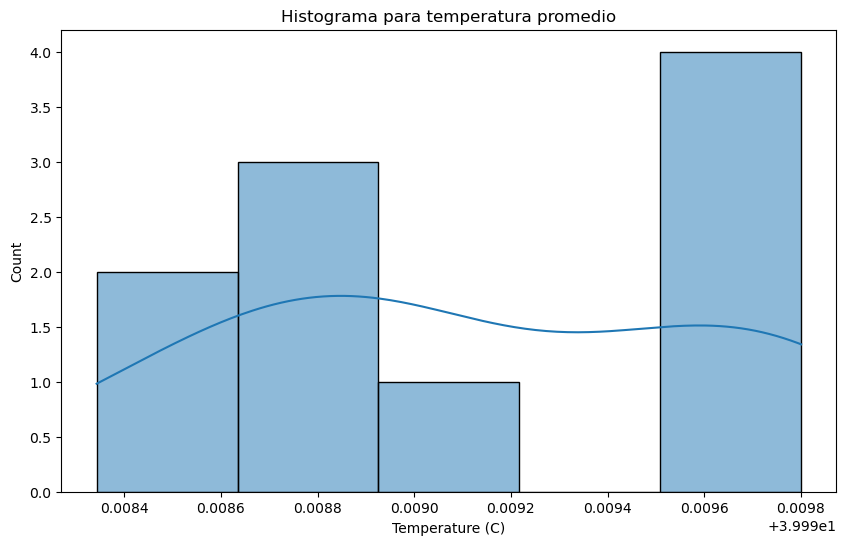

In [67]:
def histograma (df, column, titulo, xlabel, figsize=(10, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_title(titulo)
    ax.set_xlabel(xlabel)
    plt.show()
grafhistograma = histograma(maxTemp_porCiudad, "Temperature (C)", "Histograma para temperatura promedio", "Temperature (C)")

### Asi mismo un diagrama de caja y bigotes

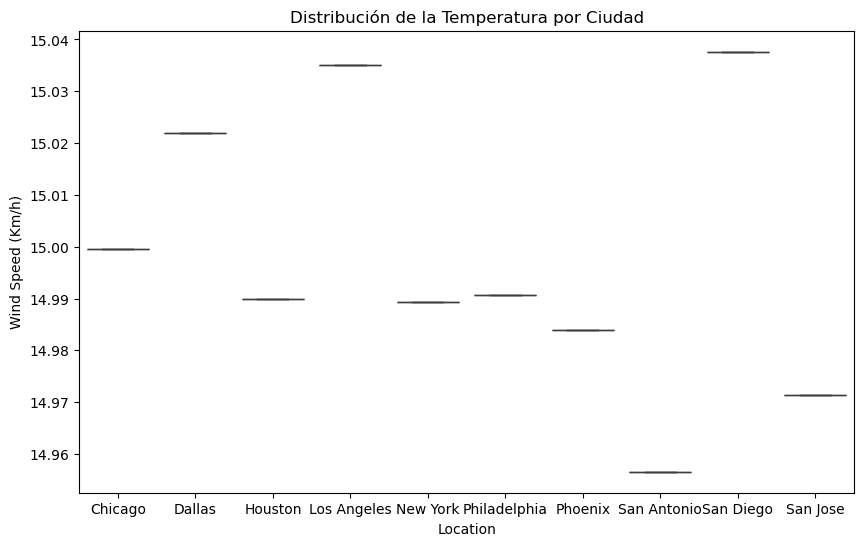

In [70]:
def graficoCaja(df, x, y, titulo):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[x], y=df[y])
    plt.title(titulo)
    plt.show()

graficoCaja(mediaWind_porCiudad, 'Location', 'Wind Speed (Km/h)', 'Distribución de la Temperatura por Ciudad')


### En el caso de usar bucles que generen graficos y los guarde, nuestro codigo presentara la siguiente estrcutura:

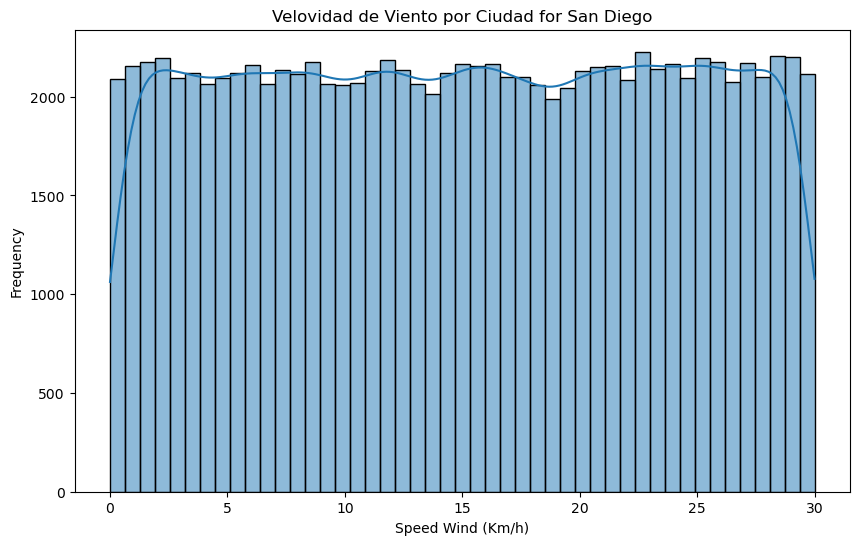

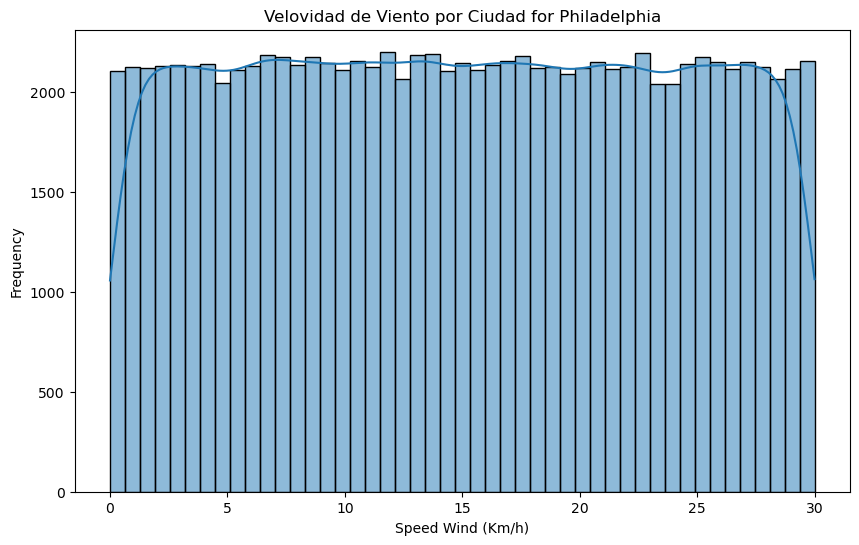

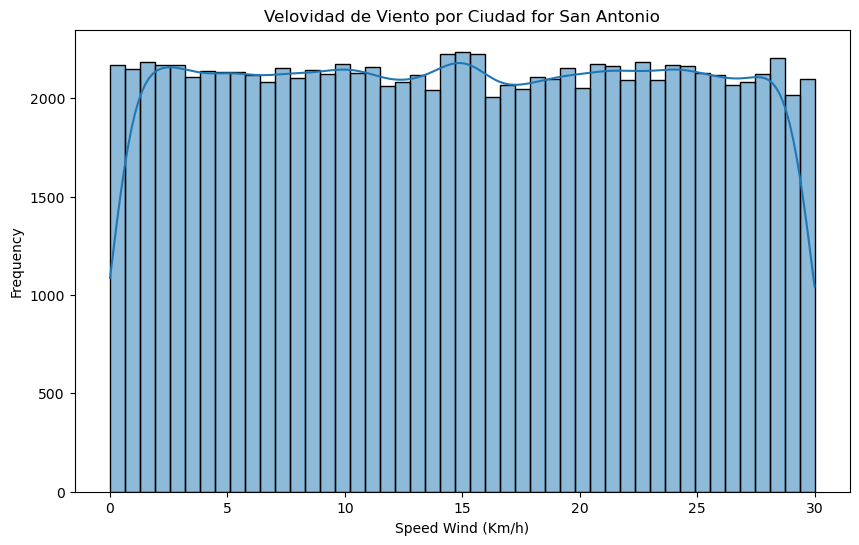

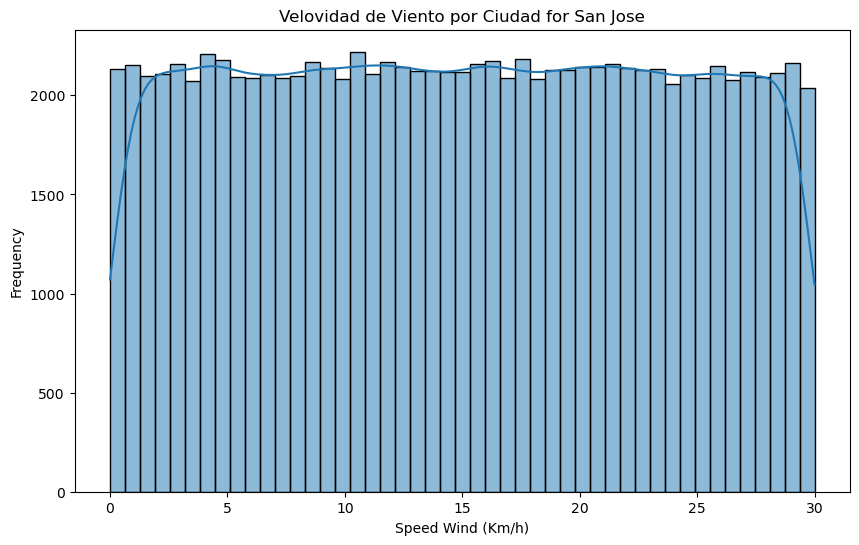

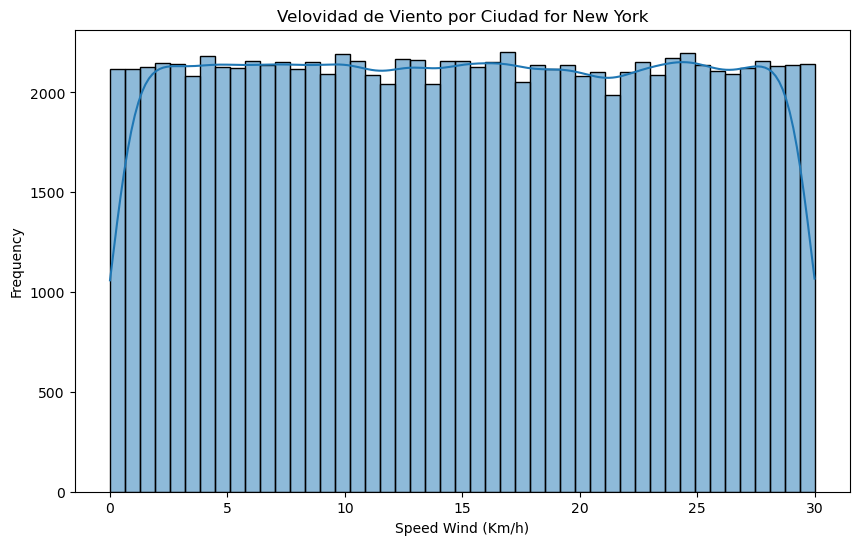

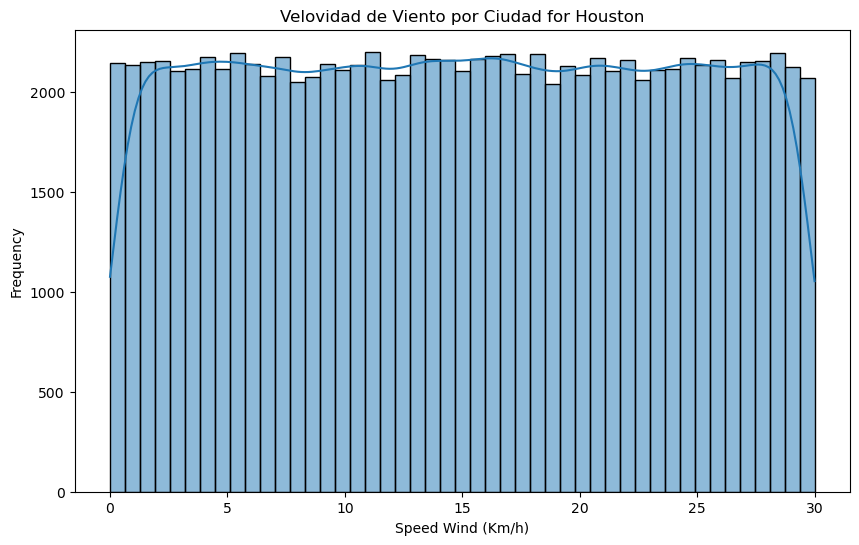

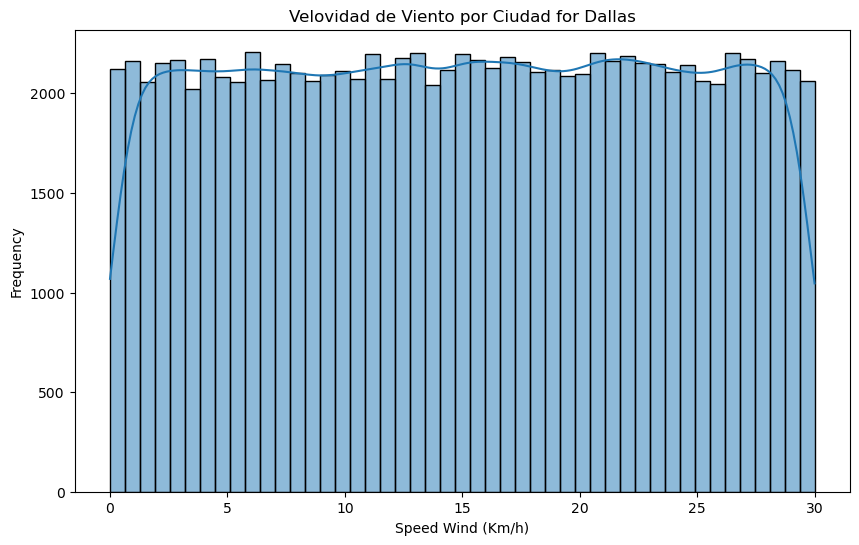

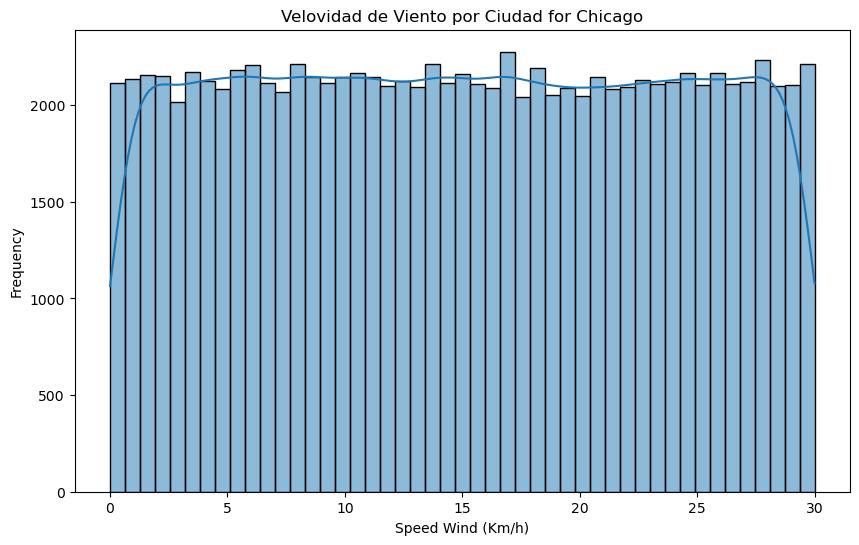

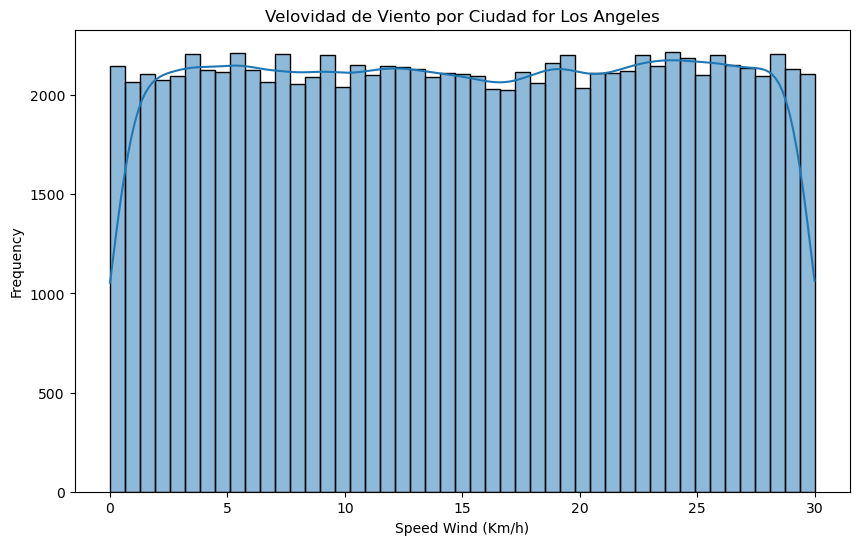

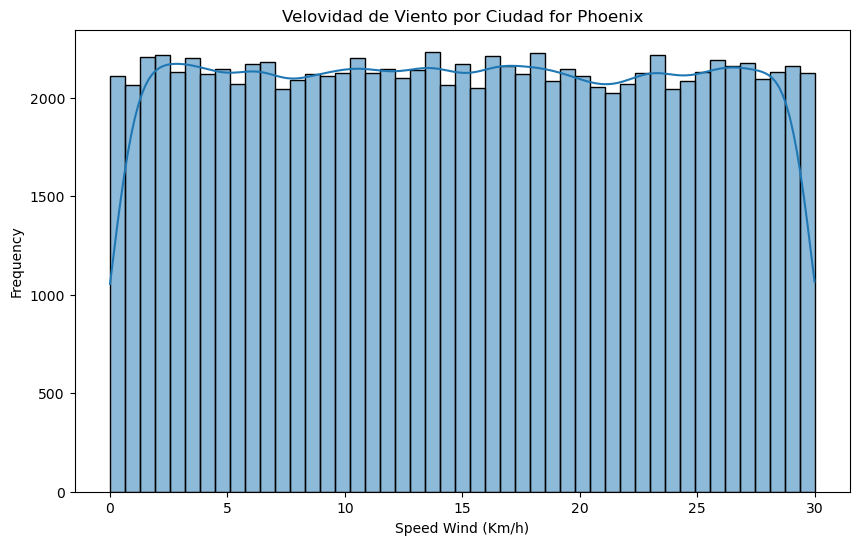

In [85]:
def graficoBucle(df, def1, def2, xlabel, ylabel, titulo):
    ciudades = df[def1].unique()
    for ciudad in ciudades:
        df_ciudad = df[df[def1]==ciudad]

        fig, ax = plt.subplots(figsize=(10,6))
        sns.histplot(df_ciudad, x = def2, kde=True)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(f"{titulo} for {ciudad}")
        plt.show()

        fig_filename = f"Speed Wind_{ciudad}.png"
        fig.savefig(fig_filename, dpi = 400)

    
graficoBucle(data, def1 ="Location", def2 = "Wind Speed (Km/h)", xlabel ="Wind Speed (Km/h)", ylabel = "Frequency", titulo = "Velovidad de Viento por Ciudad")

## **Conclusiones**
#### Texto
## **Bibliografía**

#### Citas
